<a href="https://colab.research.google.com/github/ajalamarvellous/Deeplearning/blob/main/Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd

In [ ]:
def sigmoid(X):
    return 1/(1+torch.exp(-X))

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#pathway= "/content/gdrive/MyDrive/Data/"
#Data = pd.read_csv(pathway+"diabetes_mod.csv")

In [ ]:
 
#C= np.array(Data.values)
#X= C[:,:-1]
#Y = C[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state= 17)

In [ ]:
#X_train = torch.Tensor(X_train)
#X_test = torch.Tensor(X_test)
#Y_train = torch.Tensor(Y_train)
#Y_test = torch.Tensor(Y_test)

In [ ]:
from torchvision import transforms, datasets
 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
 
trainset = datasets.MNIST("data/", download= True, train= False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle = True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images), images.shape, labels.shape)

<class 'torch.Tensor'> torch.Size([64, 1, 28, 28]) torch.Size([64])


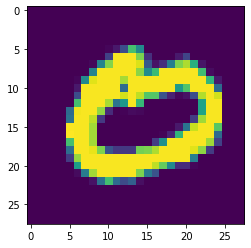

In [ ]:
import matplotlib.pyplot as plt
 
plt.imshow(images[20].numpy().squeeze())

In [ ]:
 
def NeuralNetwork(data,Y):
  data = data.view(data.shape[0], -1)
  N1= 100
  N2=50
  N3= 16
  N4= 10
  N= data.shape[1]
  softmax = nn.Softmax(dim= 1)
 
 
  W1= torch.rand(N, N1)
  b1 = torch.rand(N1)
  W2= torch.rand(N1, N2)
  b2= torch.rand(N2)
  W3= torch.rand(N2, N3)
  b3 = torch.rand(N3)
  W4 = torch.rand(N3, N4)
  b4 = torch.rand(N4)
 
  fc1 = sigmoid(torch.matmul(data,W1)+b1)
  fc2 = sigmoid(torch.matmul(fc1, W2)+b2)
  fc3 = sigmoid(torch.matmul(fc2, W3)+b3)
  fc4 = softmax(torch.matmul(fc3, W4)+b4)
  """X= []
  for _ in fc4:
    if _ > 0.5:
      X.append(1)
    else:
      X.append(0)
  X= np.array(X)
  Y= Y.numpy()
  cost = np.mean( -Y* np.log(X) + (1- Y) * np.log(1-X))"""
  X= fc4.argmax(1)
  acc =0 
  for i in range(len(X)):
    if X[i] == Y[i]:
      acc += 1
  accuracy = acc/data.shape[0]
 
  print(f"The cost function is and the accuracy is {accuracy}")

In [ ]:
NeuralNetwork(images, labels)

The cost function is and the accuracy is 0.125


In [ ]:
c = b.argmax(1)
c

tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
from torch import nn

In [ ]:
def TorchNetwork(data,Y):
  N1= 100
  N2=50
  N3= 16
  N4= 1
  N= data.shape[1]
  sigmoid = nn.Sigmoid()
  softmax = nn.Softmax(dim = 1)
  hidden1= nn.Linear(N,N1)
  hidden2 = nn.Linear(N1,N2)
  hidden3 = nn.Linear(N2,N3)
  output = nn.Linear(N3,N4)
 
  x= sigmoid(hidden1(data))
  x= sigmoid(hidden2(x))
  x= sigmoid(hidden3(x))
  x= softmax(output(x))
  X= []
  for _ in x:
    if _ > 0.5:
      X.append(1)
    else:
      X.append(0)
  X= np.array(X)
  Y= Y.numpy()
  cost = np.mean( -Y* np.log(X) + (1- Y) * np.log(1-X))
  acc =0
  for i in range(len(X)):
    if X[i] == Y[i]:
      acc += 1
  accuracy = acc/data.shape[0]
  print(f"The cost function is {cost} and the accuracy is {accuracy}")

In [ ]:
TorchNetwork(X_train, Y_train)

The cost function is nan and the accuracy is 0.6274038461538461


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


In [ ]:
import torch.nn.functional as F

In [ ]:
def TorchNetwork2(data,Y):
  N1= 100
  N2=50
  N3= 16
  N4= 1
  N= data.shape[1]
 
  hidden1= nn.Linear(N,N1)
  hidden2 = nn.Linear(N1,N2)
  hidden3 = nn.Linear(N2,N3)
  output = nn.Linear(N3,N4)
 
  fc1= F.sigmoid(hidden1(data))
  fc2= F.sigmoid(hidden2(fc1))
  fc3= F.sigmoid(hidden3(fc2))
  fc4= F.sigmoid(output(fc3))
 
  X= []
  for _ in fc4:
    if _ > 0.5:
      X.append(1)
    else:
      X.append(0)
  X= np.array(X)
  Y= Y.numpy()
  cost = np.mean( -Y* np.log(X) + (1- Y) * np.log(1-X))
  acc =0
  for i in range(len(X)):
    if X[i] == Y[i]:
      acc += 1
  accuracy = acc/data.shape[0]
  print(f"The cost function is {cost} and the accuracy is {accuracy}")

In [ ]:
TorchNetwork2(X_train, Y_train)

The cost function is nan and the accuracy is 0.6274038461538461


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


In [ ]:
 def TorchNetwork3(data,Y):
  data = data.view(data.shape[0], -1)
  N1= 100
  N2=50
  N3= 16
  N4= 10
  N= data.shape[1]
 
  hidden1= nn.Linear(N,N1)
  hidden2 = nn.Linear(N1,N2)
  hidden3 = nn.Linear(N2,N3)
  output = nn.Linear(N3,N4)
 
  fc1= F.relu(hidden1(data))
  fc2= F.relu(hidden2(fc1))
  fc3= F.relu(hidden3(fc2))
  fc4= F.softmax(output(fc3), dim= 1)
 
  """X= []
  for _ in fc4:
    if _ > 0.5:
      X.append(1)
    else:
      X.append(0)
  X= np.array(X)
  Y= Y.numpy()
  cost = np.mean( -Y* np.log(X) + (1- Y) * np.log(1-X))"""
  X= fc4.argmax(1)
  acc =0
  for i in range(len(X)):
    if X[i] == Y[i]:
      acc += 1
  accuracy = acc/data.shape[0]
  print(f"The cost function is and the accuracy is {accuracy}")

In [ ]:
TorchNetwork3(images, labels)

The cost function is and the accuracy is 0.15625


In [ ]:
 
def TorchNetwork4(data, Y):
  data = data.view(data.shape[0], -1)
  N0= data.shape[1]
  N = [100,50,16]
  N1 = 10
  criterion = nn.NLLLoss()
 
  model = nn.Sequential(nn.Linear(N0,N[0],),
                        nn.ReLU(),
                        nn.Linear(N[0], N[1]),
                        nn.ReLU(),
                        nn.Linear(N[1], N[2]),
                        nn.ReLU(),
                        nn.Linear(N[2],N1),
                        nn.LogSoftmax(dim= 1))
  forward = model.forward(data)
  X= forward.argmax(dim=1)
  """for _ in forward:
    if _ > 0.5:
      X.append(1)
    else:
      X.append(0)
  X= np.array(X)
  Y= Y.numpy()
  cost = np.mean( -Y* np.log(X) + (1- Y) * np.log(1-X))"""
  acc =0
  for i in range(len(X)):
    if X[i] == Y[i]:
      acc += 1
  accuracy = acc/data.shape[0]
  cost = criterion(forward, Y)
  print(f"The loss function is {cost} and the accuracy is {accuracy}")

In [ ]:
 
images, labels= next(iter(trainloader))
TorchNetwork4(images, labels)

The loss function is 2.3696835041046143 and the accuracy is 0.0625


In [ ]:
from torch import optim

In [ ]:
n= 784
N=[500,250,100]
N_out = 10
Epoch= 10
LR = 0.01
 
model = nn.Sequential(nn.Linear(n,N[0]),
                       nn.ReLU(),
                       nn.Linear(N[0], N[1]),
                       nn.ReLU(),
                       nn.Linear(N[1], N[2]),
                       nn.ReLU(),
                       nn.Linear(N[2], N_out),
                       nn.LogSoftmax(dim=1))
criterion= nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = LR)
 
 
for x in range(Epoch):
  running_loss= 0
  for images, labels in trainloader:
    optimizer.zero_grad()
    images = images.view(images.shape[0], -1)
    forward= model(images)
    loss = criterion(forward, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    
    X = forward.argmax(dim=1)
    acc = 0
    for _ in range(len(labels)):
      if X[_] == labels[_]:
        acc += 1
    acc /= len(labels)
    print(f"Epoch {x}........ Loss {running_loss/len(trainloader)}......... accuracy {acc}")
    print("_____________________________________________")

Epoch 0........ Loss 0.869682105388611......... accuracy 0.875
_____________________________________________
Epoch 1........ Loss 0.3770400211215019......... accuracy 0.9375
_____________________________________________
Epoch 2........ Loss 0.29480040213389763......... accuracy 1.0
_____________________________________________
Epoch 3........ Loss 0.28416250309177266......... accuracy 0.875
_____________________________________________
Epoch 4........ Loss 0.27765742565985696......... accuracy 0.9375
_____________________________________________
Epoch 5........ Loss 0.22244641725804395......... accuracy 0.875
_____________________________________________
Epoch 6........ Loss 0.23197432189800177......... accuracy 0.9375
_____________________________________________
Epoch 7........ Loss 0.20607725982583916......... accuracy 0.9375
_____________________________________________
Epoch 8........ Loss 0.19506595064263055......... accuracy 0.9375
_____________________________________________
E